In [1]:
#%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.figure_format = 'retina'
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tqdm.auto import tqdm
from pandarallel import pandarallel

In [2]:
pandarallel.initialize(progress_bar=False, nb_workers=8)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [3]:
from rdkit import Chem 
from rdkit.Chem import Scaffolds
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol, MakeScaffoldGeneric

def generate_scaffolds(smiles :str) -> (str , str):
    murcko_smi = ""
    carbon_smi = ""
    if smiles:
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                murcko_mol = GetScaffoldForMol(mol)
                carbon_mol = MakeScaffoldGeneric(murcko_mol)
                murcko_smi = Chem.MolToSmiles(murcko_mol)
                carbon_smi = Chem.MolToSmiles(carbon_mol)
        except:
            pass
    return murcko_smi, carbon_smi

In [4]:
def read_npz(file):
    file = np.load(file)
    if "arr_0" in file:
        fp = file["arr_0"]
    else:
        fp = file["fps"]
    file.close()
    fp = np.unpackbits(fp, axis=1)
    return fp

In [5]:
experiment = "output"

In [6]:
#colors = "Set1"
colors = sns.color_palette(["gray", "royalblue", "limegreen", "fuchsia"])

In [7]:
all_data = pd.read_csv(f"{experiment}/promiscuous_processed.csv")
all_data["class_set"] = all_data[["class","set"]].apply(lambda x: ' '.join(x), axis=1)

In [8]:
all_data

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,NLL_0,NLL_1,...,NLL_192,NLL_193,NLL_194,NLL_195,NLL_196,NLL_197,NLL_198,NLL_199,NLL_200,class_set
0,1483729,C#CCN1c2ccccc2Sc3c1nccc3,C#CCN1c2ccccc2Sc2cccnc21,multitarget,training,174,6,True,21.387634,21.237390,...,16.529953,16.579832,16.597193,16.598688,16.543293,16.469414,16.514149,16.565979,16.504505,multitarget training
1,2803060,C#CCSc1c(c(sn1)SCC#C)C#N,C#CCSc1nsc(SCC#C)c1C#N,multitarget,training,244,6,True,25.435406,25.543407,...,16.977541,17.072138,17.067848,17.018055,16.830230,16.742233,16.677542,16.708557,16.730461,multitarget training
2,16195846,C#Cc1ccc(cc1)C2CC(OC(=C2)C(=O)N3CCN(CC3)Cc4ccc...,C#Cc1ccc(C2C=C(C(=O)N3CCN(Cc4ccccc4)CC3)OC(OCC...,multitarget,training,151,6,True,26.490920,26.334568,...,20.697884,20.671890,20.672901,20.686928,20.666473,20.573582,20.579933,20.707083,20.698412,multitarget training
3,15910,C(#N)c1c(c(c(c(c1Cl)Cl)Cl)C#N)Cl,N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl,multitarget,test,24,5,True,16.172943,16.166480,...,14.846571,15.024720,14.982287,14.865892,14.852013,14.901800,14.970851,15.054768,14.919376,multitarget test
4,219402,C(=O)C(C1C(C(C(=O)O1)O)O)O,O=CC(O)C1OC(=O)C(O)C1O,multitarget,test,100,6,True,28.578636,28.121542,...,26.758510,26.623638,26.574932,26.662964,26.547087,26.294607,26.226974,26.233580,26.405636,multitarget test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126660,2271648,COc1ccc(cc1OC)C(=O)NCCSCc2ccco2,COc1ccc(C(=O)NCCSCc2ccco2)cc1OC,notarget,test,271,0,True,21.621990,21.261372,...,20.394420,20.464436,20.385246,20.422644,20.343554,20.201818,20.377756,20.376064,20.427292,notarget test
126661,16015661,COc1ccccc1OCC(=O)NCC2(CCCCC2)N3CCOCC3,COc1ccccc1OCC(=O)NCC1(N2CCOCC2)CCCCC1,notarget,test,36,0,True,20.991210,20.982899,...,24.373564,24.396523,24.438263,24.556833,24.522337,24.390020,24.422657,24.407433,24.354984,notarget test
126662,6460680,Cc1c(c(=O)n2c(n1)nc([nH]2)NC(=O)c3ccccc3F)Cl,Cc1nc2nc(NC(=O)c3ccccc3F)[nH]n2c(=O)c1Cl,notarget,test,35,0,True,40.816193,38.581573,...,34.832237,34.861350,35.050010,35.229584,35.210610,34.906185,35.122765,35.377747,35.315840,notarget test
126663,51359661,CCOC(=O)C1CSCCS(=O)(=O)N1Cc2cccc(c2)F,CCOC(=O)C1CSCCS(=O)(=O)N1Cc1cccc(F)c1,notarget,test,30,0,True,25.938965,26.273390,...,31.086374,31.321445,31.371016,31.305890,31.340025,31.437233,31.563883,31.821478,31.634583,notarget test


In [10]:
ecfp6 = read_npz("output/processed_fp.npz")

In [11]:
def add_epoch_to_list(epoch, mylist):
    if epoch not in mylist:
        mylist.append(epoch)
    return mylist 
        
        
epochs = list(range(26))
steps = [100,50,25,10,5,2,1]
for r in steps:
    for i in range(0,201,r):
        epochs = add_epoch_to_list(i,epochs)


In [13]:
import sklearn as sk 
import sklearn.ensemble
from sklearn.model_selection import GridSearchCV

In [14]:
pd.factorize(all_data["class"])

(array([0, 0, 0, ..., 2, 2, 2]),
 Index(['multitarget', 'singletarget', 'notarget'], dtype='object'))

In [32]:
all_data["class_label"] = pd.factorize(all_data["class"])[0]
all_data["class_label"] = all_data["class_label"].map(lambda x: 0 if x == 2 else ( 2 if x == 0 else x))
all_data["class_label_binary"] = all_data["class_label"].map(lambda x: 0 if x <= 1 else 1 )
all_data["classification_setname"] = "test"
for i in ['multitarget training', 'singletarget test', 'notarget test']:
    if i == 'multitarget training':
        n = 1000
    else:
        n = 30000
    index = all_data.query("`class_set` == @i").sample(n=n, random_state=1234).index
    all_data.loc[index, "classification_setname"] = "training"

In [33]:
rf_training_set = all_data.query("`classification_setname` == 'training'").sample(frac=1., random_state=1234).copy()
rf_input = ecfp6[rf_training_set.index]
rf_labels = rf_training_set["class_label_binary"].to_numpy()

In [46]:
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import StratifiedKFold

from xgboost import  XGBClassifier
from sklearn.model_selection import train_test_split

xgb_model = XGBClassifier(random_state=1234, verbosity=1, use_label_encoder=False, scale_pos_weight=60000/1000)

parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6, 7, 8],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000],
              'missing':[-999],
              'seed': [1234]}

clf = GridSearchCV(xgb_model, parameters,
                   verbose=2, refit=True, scoring="roc_auc")

clf.fit(rf_input, rf_labels)


/usr/local/Caskroom/miniconda/base/envs/reinvent_shared.v2.1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=1000, objective=binary:logistic, seed=1234, subsample=0.8 
[00:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=1000, objective=binary:logistic, seed=1234, subsample=0.8, total= 7.8min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=1000, objective=binary:logistic, seed=1234, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.8min remaining:    0.0s


[00:20:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=1000, objective=binary:logistic, seed=1234, subsample=0.8, total= 8.0min
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=1000, objective=binary:logistic, seed=1234, subsample=0.8 
[00:28:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 23.9min finished


[00:36:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_con...
                                     validate_parameters=None, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [7], 'min_child_weight': [11],
                         'missing': [-999], 'n_estimators': 

In [47]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 1000,
 'objective': 'binary:logistic',
 'seed': 1234,
 'subsample': 0.8}

In [48]:
rf_multitarget_test = all_data.query("`classification_setname` == 'test'").copy()
rf_input_test = ecfp6[rf_multitarget_test.index]
rf_labels_test = rf_multitarget_test["class_label_binary"].to_numpy()

In [50]:
from sklearn import metrics
def evaluate(model, input_ecfp6, input_label):
    prediction_proba = model.predict_proba(input_ecfp6)
    
    predictions = np.argmax(prediction_proba, axis=1)
    
    scores_bin = {
        "f1": metrics.f1_score,
        "bal.acc": metrics.balanced_accuracy_score,
        "mcc": metrics.matthews_corrcoef,
        "precision": metrics.precision_score,
        "recall": metrics.recall_score,
    }
    scores_proba = {
        "roc_auc": metrics.roc_auc_score
    }
    
    results = {}
    
    for name, fn in scores_bin.items():
        results[name] = fn(input_label, predictions)
    
    for name, fn in scores_proba.items():
        results[name] = fn(input_label, prediction_proba[:,1])
    
    return results

In [51]:
results = evaluate(clf, rf_input_test, rf_labels_test)

In [52]:
results

{'f1': 0.32261640798226165,
 'bal.acc': 0.6513331015722357,
 'mcc': 0.3034824820748351,
 'precision': 0.3235130628126737,
 'recall': 0.32172470978441126,
 'roc_auc': 0.8190286387877421}

In [72]:
prediction_percentage = {}

In [74]:
import pickle

epochs = []
steps = [100,50,25,10,5,4,3,2,1]
for r in steps:
    for i in range(0,201,r):
        epochs = add_epoch_to_list(i,epochs)
        
for epoch in tqdm(epochs):
    
    if epoch in prediction_percentage:
        continue
        
    if os.path.exists(f"sampled/{epoch}/predictions.npz"):
        predictions = np.load(f"sampled/{epoch}/predictions.npz")["predictions"]
    else:
        ecfp6_generated = read_npz(f"sampled/{epoch}/processed_fp.npz")
        predictions = clf.predict(ecfp6_generated)
        
        np.savez_compressed(f"sampled/{epoch}/predictions.npz", predictions=predictions)
    
    data = pd.read_feather(f"sampled/{epoch}/processed_with_nn_with_scaffold.feather")
    data["prediction"] = predictions
    
    data = data.query("valid == 1")
    percentage = (len(data.query("prediction == 1"))/len(data))*100

    prediction_percentage[epoch] = percentage

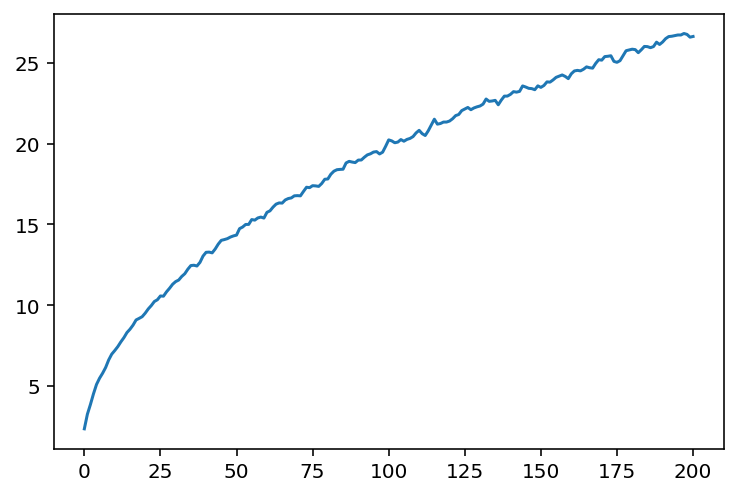

In [79]:
values = sorted(list(prediction_percentage.items()), key= lambda x: x[0])
x = [v[0] for v in values]
y = [v[1] for v in values]


plt.plot(x,y)

In [80]:
values

[(0, 2.369800356477224),
 (1, 3.2712833182489014),
 (2, 3.873345482202927),
 (3, 4.530541033608518),
 (4, 5.112426809187005),
 (5, 5.4967445423209496),
 (6, 5.8047070217126135),
 (7, 6.160315562504471),
 (8, 6.626789173812463),
 (9, 6.984725573071902),
 (10, 7.208274321237513),
 (11, 7.4510733177606845),
 (12, 7.743084853177627),
 (13, 8.004214088790155),
 (14, 8.318056875427894),
 (15, 8.524445062234387),
 (16, 8.777388466368501),
 (17, 9.097701631120279),
 (18, 9.194469789934985),
 (19, 9.29913698597947),
 (20, 9.517164586961963),
 (21, 9.77832341249576),
 (22, 9.986671364882877),
 (23, 10.23677257465261),
 (24, 10.345352851632505),
 (25, 10.579170714249194),
 (26, 10.565981381828001),
 (27, 10.835418496616873),
 (28, 11.055131961810083),
 (29, 11.30157048899758),
 (30, 11.46763983598224),
 (31, 11.563417603666833),
 (32, 11.785144231408305),
 (33, 11.953028644883354),
 (34, 12.232449363380063),
 (35, 12.459714690028056),
 (36, 12.478496717395505),
 (37, 12.431349348668165),
 (38, 12